In [43]:
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [44]:
model=ResNet50(weights='imagenet')

In [45]:
def predict(model,img,target_size,top_n=3):
    if img.size!=target_size:
        img=img.resize(target_size)
        
    x=np.array(img)  #converts image to numpy array (PIL->numpy array)
    x=np.expand_dims(x,axis=0) #model function requires a 4 dimensional array. 'np.expand_dims' converts 3 dimensional image to 4 
                               #dimensional image.
    x=preprocess_input(x)  #from keras (zero-centering)
    preds=model.predict(x)
    return decode_predictions(preds,top=top_n)[0]
    

In [57]:
import matplotlib.pyplot as plt

In [72]:
def plot_preds(image,preds):
    plt.imshow(image)  #display the image
    plt.axis('off')
    #for bar graph
    plt.figure()
    order=list(reversed(range(len(preds))))
    bar_preds=[pr[2] for pr in preds]
    labels=(pr[1] for pr in preds)
    plt.barh(order,bar_preds,alpha=0.5)
    plt.yticks(order,labels)
    plt.xlabel('Probability')
    plt.xlim(0,1.01)
    plt.tight_layout()
    plt.show()

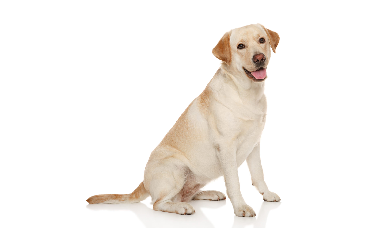

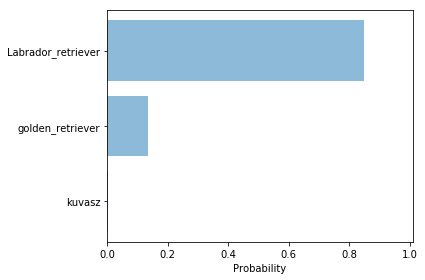

In [77]:
#not sure about this cell but should work
from PIL import Image
target_size=(224,224)
img=Image.open("D:\\Research\\Testing Pictures for RestNet50\\labrador.jpg")
plot_preds(img,predict(model,img,target_size))